In [1]:
import sys 
import pandas as pd
import numpy as np 
import seaborn as sns
import chardet 
import matplotlib.pyplot as plt

In [2]:
colo_data = pd.read_csv('colo_jan1_march31_base.txt', delimiter='\t')  # Use the appropriate delimiter

In [3]:
colo_data

# need to fix the formatting so it shows up as correct table separation

,NAMEBLUEPRINTOWNERSTATE
0,FM HC virtual HA 6.1FM HC virtual HA 6.1justin...
1,ActiveEnding In 1w:1d
2,Application IntelligenceApplication Intelligen...
3,CompletedEnded ~1 Week Ago
4,VMware Cloud AutomationVMware Cloud Automation...
...,...
59,CompletedEnded 2 Months Ago
60,Application IntelligenceApplication Intelligen...
61,CompletedEnded 3 Months Ago
62,Application IntelligenceApplication Intelligen...


In [4]:
# starting off with the colo data

# we will create a new column called ending time that holds the end time for the blueprints

colo_data.rename(columns = {"NAMEBLUEPRINTOWNERSTATE": "Blueprint"}, inplace = True)


In [5]:
colo_data["End time"] = colo_data["Blueprint"].iloc[1::2].reset_index(drop = True)

In [6]:
colo_data["End time"] = colo_data["End time"].apply(lambda x: [x, x]).explode().reset_index(drop = True)

In [7]:
# end time is now included as a separate column 
colo_data = colo_data.drop(colo_data.index[1::2]).reset_index(drop=True)

In [8]:
import re
colo_data['Email'] = colo_data['Blueprint'].apply(lambda x: re.findall(r'\S+@\S+', x)[0] if re.findall(r'\S+@\S+', x) else '')
colo_data

,Blueprint,End time,Email
0,FM HC virtual HA 6.1FM HC virtual HA 6.1justin...,ActiveEnding In 1w:1d,6.1justin.jolly@gigamon.com
1,Application IntelligenceApplication Intelligen...,CompletedEnded ~1 Week Ago,Intelligencedivyanshu.arora@gigamon.com
2,VMware Cloud AutomationVMware Cloud Automation...,CompletedEnded ~1 Week Ago,Automationsrinath.babu@gigamon.com
3,Application IntelligenceApplication Intelligen...,CompletedEnded ~1 Week Ago,Intelligencenadav.katz@gigamon.com
4,VMware Cloud AutomationVMware Cloud Automation...,CompletedEnded 2 Weeks Ago,Automationsrinath.babu@gigamon.com
5,VMware Cloud AutomationVMware Cloud Automation...,CompletedEnded 2 Weeks Ago,Automationsrinath.babu@gigamon.com
6,VMware Cloud AutomationVMware Cloud Automation...,CompletedEnded 3 Weeks Ago,Automationsrinath.babu@gigamon.com
7,Application IntelligenceApplication Intelligen...,CompletedEnded 3 Weeks Ago,Intelligencenadav.katz@gigamon.com
8,Application IntelligenceApplication Intelligen...,CompletedEnded 3 Weeks Ago,
9,Application IntelligenceApplication Intelligen...,CompletedEnded 3 Weeks Ago,


In [9]:
strings_remove = ['Intelligence', '6.1', 'Automation', 'blueprint', 'test', 'HC1']

for string in strings_remove:
    colo_data['Email'] = colo_data['Email'].str.replace(string, '')

colo_data

,Blueprint,End time,Email
0,FM HC virtual HA 6.1FM HC virtual HA 6.1justin...,ActiveEnding In 1w:1d,justin.jolly@gigamon.com
1,Application IntelligenceApplication Intelligen...,CompletedEnded ~1 Week Ago,divyanshu.arora@gigamon.com
2,VMware Cloud AutomationVMware Cloud Automation...,CompletedEnded ~1 Week Ago,srinath.babu@gigamon.com
3,Application IntelligenceApplication Intelligen...,CompletedEnded ~1 Week Ago,nadav.katz@gigamon.com
4,VMware Cloud AutomationVMware Cloud Automation...,CompletedEnded 2 Weeks Ago,srinath.babu@gigamon.com
5,VMware Cloud AutomationVMware Cloud Automation...,CompletedEnded 2 Weeks Ago,srinath.babu@gigamon.com
6,VMware Cloud AutomationVMware Cloud Automation...,CompletedEnded 3 Weeks Ago,srinath.babu@gigamon.com
7,Application IntelligenceApplication Intelligen...,CompletedEnded 3 Weeks Ago,nadav.katz@gigamon.com
8,Application IntelligenceApplication Intelligen...,CompletedEnded 3 Weeks Ago,
9,Application IntelligenceApplication Intelligen...,CompletedEnded 3 Weeks Ago,


In [10]:
#strings = ['justin.jolly@gigamon.com', 'divyanshu.arora@gigamon.com']
colo_data['Blueprint'] = colo_data['Blueprint'].str.replace('admin', '')
strings = colo_data['Email'].unique()

for string in strings:
    colo_data['Blueprint'] = colo_data['Blueprint'].str.replace(string, '')


new_word = 'admin'
colo_data['Email'].fillna('', inplace=True)

colo_data['Email'] = colo_data['Email'].replace('', new_word)
colo_data

,Blueprint,End time,Email
0,FM HC virtual HA 6.1FM HC virtual HA 6.1,ActiveEnding In 1w:1d,justin.jolly@gigamon.com
1,Application IntelligenceApplication Intelligence,CompletedEnded ~1 Week Ago,divyanshu.arora@gigamon.com
2,VMware Cloud AutomationVMware Cloud Automation,CompletedEnded ~1 Week Ago,srinath.babu@gigamon.com
3,Application IntelligenceApplication Intelligence,CompletedEnded ~1 Week Ago,nadav.katz@gigamon.com
4,VMware Cloud AutomationVMware Cloud Automation,CompletedEnded 2 Weeks Ago,srinath.babu@gigamon.com
5,VMware Cloud AutomationVMware Cloud Automation,CompletedEnded 2 Weeks Ago,srinath.babu@gigamon.com
6,VMware Cloud AutomationVMware Cloud Automation,CompletedEnded 3 Weeks Ago,srinath.babu@gigamon.com
7,Application IntelligenceApplication Intelligence,CompletedEnded 3 Weeks Ago,nadav.katz@gigamon.com
8,Application IntelligenceApplication Intelligence,CompletedEnded 3 Weeks Ago,admin
9,Application IntelligenceApplication Intelligence,CompletedEnded 3 Weeks Ago,admin


In [11]:
# creating summary statistics


# 1: Unique Blueprints and Counts

Blueprint_Counts = colo_data["Blueprint"].value_counts()
res = pd.DataFrame(Blueprint_Counts)
res = res.reset_index()
res['Blueprint']

0    Application IntelligenceApplication Intelligence
1      VMware Cloud AutomationVMware Cloud Automation
2        PST Use Cases with HC1PST Use Cases with HC1
3            FM HC virtual HA 6.1FM HC virtual HA 6.1
4                       FM HA 6.1FM HC virtual HA 6.1
5                   test-blueprint-SriramNo blueprint
6    FM HA HC 6.1 e-learningFM HC 6.1 e-learning test
Name: Blueprint, dtype: object

[Text(0, 0, 'Application Intelligence'),
 Text(1, 0, 'VMware Cloud Automation'),
 Text(2, 0, 'PST Use Cases with HC1PST'),
 Text(3, 0, 'FM HC virtual HA 6.1FM'),
 Text(4, 0, 'FM HA 6.1FM HC'),
 Text(5, 0, 'test-blueprint'),
 Text(6, 0, 'FM HA HC 6.1 e-learning')]

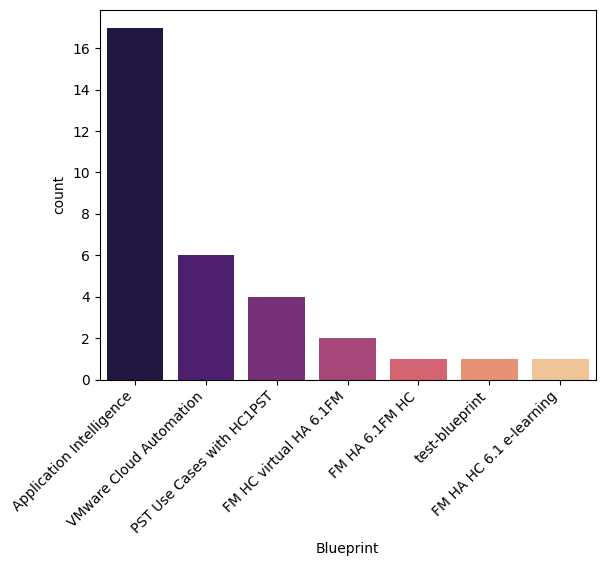

In [12]:
blueprint_count = sns.barplot(data = res, x = 'Blueprint', y = 'count', palette='magma')

# Get the current x-axis tick labels
labels = [label.get_text() for label in blueprint_count.get_xticklabels()]

# Define the new labels
new_labels = ['Application Intelligence', 'VMware Cloud Automation', 'PST Use Cases with HC1PST', 'FM HC virtual HA 6.1FM', 'FM HA 6.1FM HC', 'test-blueprint', 'FM HA HC 6.1 e-learning']

# Set the new x-axis tick labels
blueprint_count.set_xticklabels(new_labels)
blueprint_count.set_xticklabels(blueprint_count.get_xticklabels(), rotation=45, ha='right')

In [13]:
# creating the top users table 

User_Counts = colo_data["Email"].value_counts()
users = pd.DataFrame(User_Counts)
users = users.reset_index()
users

,Email,count
0,nadav.katz@gigamon.com,7
1,srinath.babu@gigamon.com,6
2,admin,5
3,divyanshu.arora@gigamon.com,4
4,david.anderson@gigamon.com,4
5,justin.jolly@gigamon.com,3
6,andrea.baraldi@gigamon.com,2
7,naveen.bodla@gigamon.com,1


[Text(0, 0, 'nadav'),
 Text(1, 0, 'srinath'),
 Text(2, 0, 'admin'),
 Text(3, 0, 'divyanshu'),
 Text(4, 0, 'david'),
 Text(5, 0, 'justin'),
 Text(6, 0, 'andrea'),
 Text(7, 0, 'naveen')]

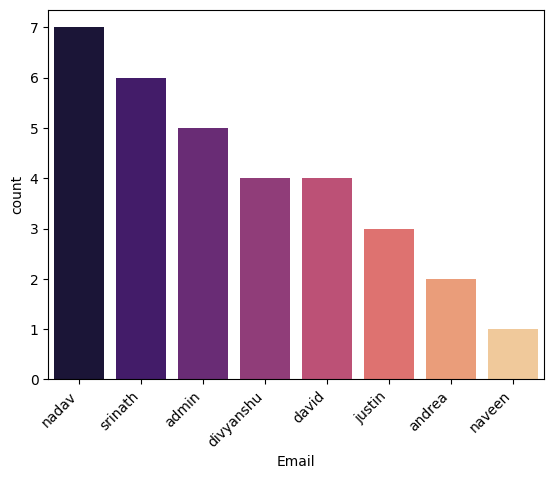

In [14]:
user_chart = sns.barplot(data = users, x = 'Email', y = 'count', palette='magma')

# Get the current x-axis tick labels
labels = [label.get_text() for label in user_chart.get_xticklabels()]

# Define the new labels
new_labels = ['nadav', 'srinath', 'admin', 'divyanshu', 'david', 'justin', 'andrea', 'naveen']

# Set the new x-axis tick labels
user_chart.set_xticklabels(new_labels)
user_chart.set_xticklabels(user_chart.get_xticklabels(), rotation=45, ha='right')

In [15]:

pivot_table = colo_data.pivot_table(index='Email', columns='Blueprint', values='Blueprint', aggfunc='count', fill_value=0)
pivot_table

Blueprint,Application IntelligenceApplication Intelligence,FM HA 6.1FM HC virtual HA 6.1,FM HA HC 6.1 e-learningFM HC 6.1 e-learning test,FM HC virtual HA 6.1FM HC virtual HA 6.1,PST Use Cases with HC1PST Use Cases with HC1,VMware Cloud AutomationVMware Cloud Automation,test-blueprint-SriramNo blueprint
Email,,,,,,,
admin,4,0,0,0,1,0,0
andrea.baraldi@gigamon.com,2,0,0,0,0,0,0
david.anderson@gigamon.com,4,0,0,0,0,0,0
divyanshu.arora@gigamon.com,1,1,0,0,1,0,1
justin.jolly@gigamon.com,0,0,1,2,0,0,0
nadav.katz@gigamon.com,5,0,0,0,2,0,0
naveen.bodla@gigamon.com,1,0,0,0,0,0,0
srinath.babu@gigamon.com,0,0,0,0,0,6,0


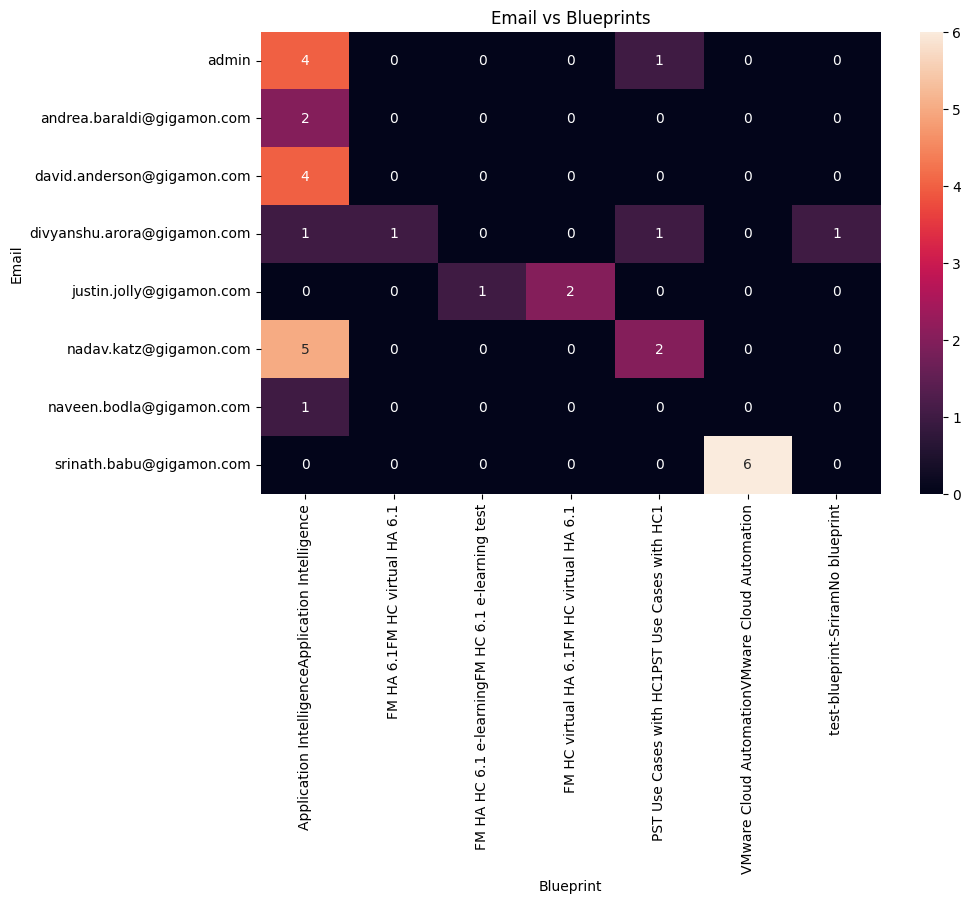

In [16]:
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.heatmap(pivot_table, annot=True)

# Set plot title and labels
plt.title('Email vs Blueprints')
plt.xlabel('Blueprint')
plt.ylabel('Email')

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)

# Display the plot
plt.show()